In [1]:
import numpy as np
import pandas as pd
from io import StringIO

# For waveform data and handling
import wfdb
import os
import glob
import matplotlib.pyplot as plt

record found


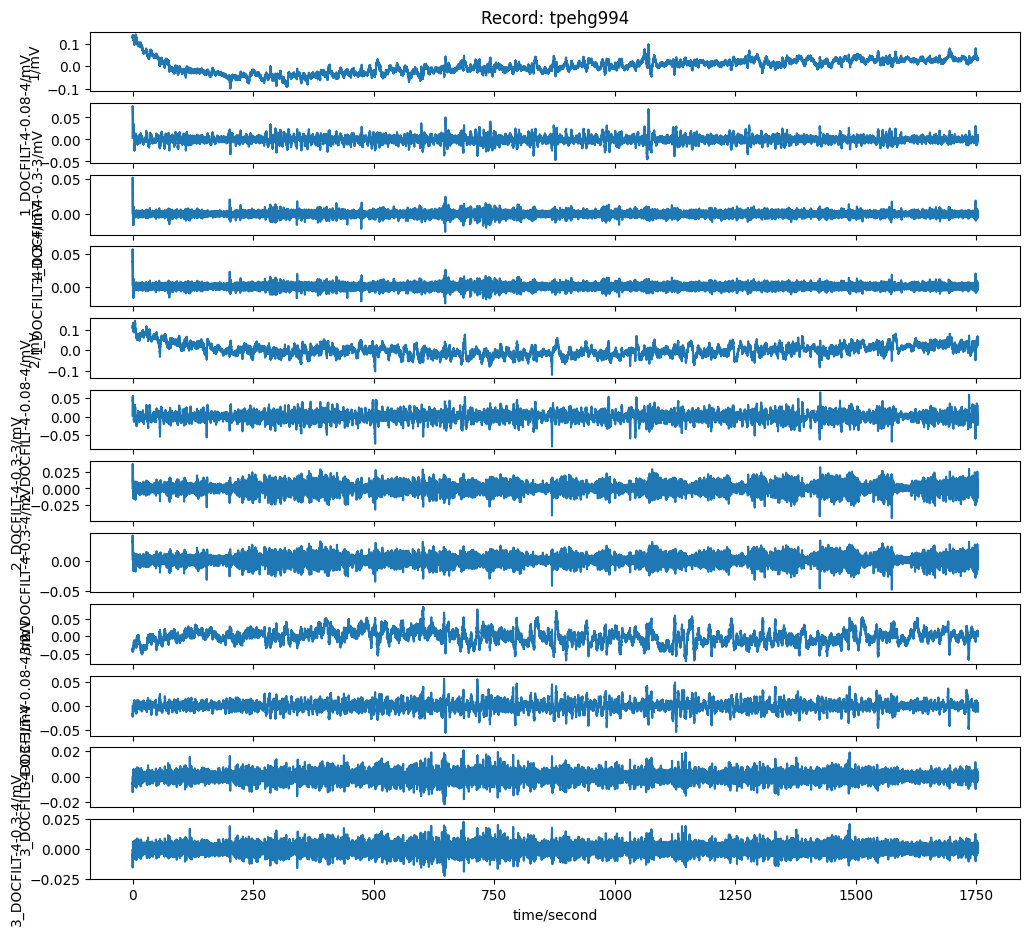

In [2]:

patient_record = wfdb.rdrecord("C:/Users/thetu/Downloads/TDA/term_preterm_ehg/tpehgdb/tpehg994")
print("record found")
wfdb.plot_wfdb(patient_record, figsize = (12,11)) # Visualization of 12 channels (sensors/leads) for the patient record 

plt.show()

In [3]:
df = pd.read_csv("C:/Users/thetu/Downloads/TDA/term_preterm_ehg/tpehgdb/tpehg1021.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.071794,-0.001907,-0.000305,-0.000916,-0.062257,-0.001068,-0.000381,-0.000916,0.036851,0.001831,0.000153,0.000610
1,-0.069810,-0.011215,-0.002441,-0.005493,-0.062333,-0.006561,-0.002518,-0.005570,0.035706,0.010758,0.001373,0.003510
2,-0.071336,-0.029068,-0.007477,-0.013886,-0.063249,-0.017243,-0.007858,-0.014267,0.038300,0.027695,0.004120,0.008621
3,-0.073930,-0.045624,-0.014420,-0.020981,-0.064698,-0.027619,-0.014954,-0.021973,0.039673,0.042649,0.007553,0.012207
4,-0.075761,-0.051499,-0.019989,-0.022431,-0.067979,-0.031586,-0.020523,-0.023651,0.038224,0.046387,0.009918,0.011444
...,...,...,...,...,...,...,...,...,...,...,...,...
35255,0.198596,0.025406,-0.005112,-0.007553,0.095674,0.050889,-0.010071,-0.010452,-0.013199,0.035782,-0.008392,-0.007630
35256,0.198672,0.019989,0.001221,-0.001755,0.095216,0.049821,-0.006256,-0.007095,-0.013352,0.035935,-0.006714,-0.006256
35257,0.199207,0.015869,0.007553,0.007477,0.094224,0.047837,-0.002441,-0.002747,-0.015793,0.034257,-0.005035,-0.005417
35258,0.202945,0.011673,0.011597,0.014649,0.093614,0.040818,0.000534,0.001221,-0.017853,0.028916,-0.003357,-0.003967


# Try Mapper on the data

In [4]:
import kmapper as km
import plotly.graph_objects as go
import sklearn
from kmapper import jupyter

In [19]:
# Let's try mapper 
mapper = km.KeplerMapper(verbose=1)

# Look at a projection (TSNE) with 2D projection
projected_data = mapper.fit_transform(df,projection=sklearn.manifold.TSNE(verbose = 0), scaler = None)



KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (35260, 12)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35260 samples in 0.180s...
[t-SNE] Computed neighbors for 35260 samples in 9.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35260
[t-SNE] Computed conditional probabilities for sample 2000 / 35260
[t-SNE] Computed conditional probabilities for sample 3000 / 35260
[t-SNE] Computed conditional probabilities for sample 4000 / 35260
[t-SNE] Computed conditional probabilities for sample 5000 / 35260
[t-SNE] Computed conditional probabilities for sample 6000 / 35260
[t-SNE] Computed conditional probabilities for sample 7000 / 35260
[t-SNE] Computed conditional probabilities for sample 8000 / 35260
[t-SNE] Computed conditional probabilities for sample 9000 / 35260
[t-SNE] Computed conditional probabili

In [57]:
# Create clusters on the projected data using DBSCAN
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=25, metric = 'cosine'),
                   cover=km.Cover(15, 0.15),
                  remove_duplicate_nodes=True)

# Save the graph as a 
mapper.visualize(graph,path_html='EHG.html')

Mapping on data shaped (35260, 2) using lens shaped (35260, 2)

Creating 225 hypercubes.
No duplicate nodes found to remove.


Created 491 edges and 183 nodes in 0:00:02.529259.
Wrote visualization to: EHG.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [58]:
jupyter.display("EHG.html")

C:\Users\thetu\AppData\Roaming\Python\Python311\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
